# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

In [7]:
import pandas as pd
import requests
import json

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

In [4]:
# REST_API_KEY #카카오 # https://developers.kakao.com/
REST_API_KEY = '884c61e51fd621797d2d5501a7223173'

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

In [6]:
# https://developers.kakao.com/docs/latest/ko/kogpt/rest-api #request-request-query 

In [119]:
# 1. document : url, headers, params
prompt = '원자폭탄을 발명한 사람은'
url = 'https://api.kakaobrain.com/v1/inference/kogpt/generation'
params = {'prompt': prompt, 'max_tokens': 50}
headers = { 'Content-Type': 'application/json', 'Authorization': f'KakaoAK {REST_API_KEY}'}

# 2. request(url, headers, params) - > response(data) : json(str)
response = requests.post(url, json.dumps(params), headers=headers)

# 3. json(str) : text로 출력
response.json()['generations'][0]['text'].strip()

'오펜하이머였다. 그의 공적으로 노벨 물리학상, 노벨 화학상, 그리고 노벨 문학상까지 최고의 상을 받는다. 생체에서 방사능 물질을 분리하여 수백 배로 희석시키면 살균처리가 되고 수명이 오래 간다는 연구'

In [120]:
# 인터넷 환경에서 영문, 숫자, 특수문자만 사용가능
response.text

'{"id":"b08c4c40-973c-4875-9abf-0a9d503ddb1a","generations":[{"text":" 오펜하이머였다. 그의 공적으로 노벨 물리학상, 노벨 화학상, 그리고 노벨 문학상까지 최고의 상을 받는다. 생체에서 방사능 물질을 분리하여 수백 배로 희석시키면 살균처리가 되고 수명이 오래 간다는 연구","tokens":50}],"usage":{"prompt_tokens":7,"generated_tokens":50,"total_tokens":57}}\n'

In [121]:
# 다른 언어는 인코딩해서 데이터 변환
json.dumps(params)

'{"prompt": "\\uc6d0\\uc790\\ud3ed\\ud0c4\\uc744 \\ubc1c\\uba85\\ud55c \\uc0ac\\ub78c\\uc740", "max_tokens": 50}'

#### 1. 다음문장 만들기

In [122]:
prompt= "인간처럼 생각하고, 행동하는 '지능'을 통해 인류가 이제까지 풀지 못했던"

response1 = requests.post(url, json.dumps(params), headers=headers)
response1

<Response [200]>

In [123]:
response1.json()['generations'][0]['text'].strip()

"오펜하이머였다. 그는 전쟁을 반대했고, 핵무기를'공포의 예술 · 혁명다음의 3번째 무기!―테러리즘 다음이다! 라는 이유라고 하면서 정부에 모여 달라고 호소한다. 우리들 선행"

In [124]:
response.text[:500]

'{"id":"b08c4c40-973c-4875-9abf-0a9d503ddb1a","generations":[{"text":" 오펜하이머였다. 그의 공적으로 노벨 물리학상, 노벨 화학상, 그리고 노벨 문학상까지 최고의 상을 받는다. 생체에서 방사능 물질을 분리하여 수백 배로 희석시키면 살균처리가 되고 수명이 오래 간다는 연구","tokens":50}],"usage":{"prompt_tokens":7,"generated_tokens":50,"total_tokens":57}}\n'

In [125]:
# 함수만들기
def kogpt_api(prompt, command='', max_tokens=128, temperature=1, n=1):
    headers = {'Authorization': f'KakaoAK {REST_API_KEY}', 'Content-Type': 'application/json'}
    params = {'prompt': prompt + command, 'max_tokens': max_tokens, 'temperature': temperature, 'n': n}
    response = requests.post(url, json.dumps(params), headers=headers)
    results = response.json()
    results = results['generations']
    return [result['text'] for result in results]

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

In [128]:
prompt = '''상품 후기를 긍정 또는 부정으로 분류합니다.
가격대비좀 부족한게많은듯=부정
재구매 친구들이 좋은 향 난다고 해요=긍정
ㅠㅠ약간 후회가 됩니다..=부정
이전에 먹고 만족해서 재구매합니다=긍정
튼튼하고 잘 쓸수 있을 것 같습니다. 이 가격에 이 퀄리티면 훌륭하죠='''
results = kogpt_api(prompt, max_tokens=1, temperature=0.4)
results

['긍정']

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

In [129]:
prompt = '''
미국의 생성형 AI(인공지능) 모델·서비스 개발사 오픈AI(OpenAI)를 상대로 제기된 소송이 누적되고 있다. 쟁점 또한 AI 자료 학습부터 오픈소스 공개까지 전선이 전방위로 확산되는 모양새다.
5일 IT(정보기술) 업계와 블룸버그 등 외신에 따르면 일론 머스크 테슬라 CEO(최고경영자)는 미국 캘리포니아주 샌프란시스코에서 오픈AI 법인과 창립자 샘 알트먼을 상대로 영리사업 중단과 AI 기술공개를 청구하는 소송을 지난달 29일(현지시간) 제기했다.
머스크는 소장에서 오픈AI가 마이크로소프트(MS)와 체결한 수십억달러 규모의 파트너십과 사실상 비공개된 AI 기술정보 등에 비춰 오픈AI가 인류의 이익을 위해 AI 기술을 공개하기로 한 당초 창업 합의를 파기했다고 주장했다. 머스크는 2015년 알트먼 등과 오픈AI를 비영리단체 형태로 공동 설립한 뒤 2018년 이사회에서 물러났다.
오픈AI를 둘러싼 법적 분쟁은 지난해 7월 미국 코미디언 겸 작가 사라 실버맨 등이 소송을 제기하면서 부각됐다. 언어모델 훈련 과정에서 창작물이 도용돼 저작권 침해, 저작권 관리정보 삭제에 따른 디지털 밀레니엄 저작권법(DMCA) 위반, 불공정 경쟁 등이 발생했다는 주장이다.
다만 법원은 챗GPT로 생성된 결과물과 작가들의 원작물 사이의 유사성이 떨어진다는 이유로 지난달 실버맨 등의 청구를 상당 부분 기각한 채 심리를 진행 중이다. 이 사건과 별개로 '왕좌의 게임' 원작자 조지 R.R. 마틴을 비롯한 미국 작가조합은 지난해 9월 집단소송을 제기한 상태다.
지난해 12월에는 미국 신문사 뉴욕타임스가 뉴스 저작권 침해를 주장하며 오픈AI와 오픈AI의 주요 투자자 MS를 상대로 소송을 제기했다. 뉴욕타임스 측은 회사 웹사이트에서 유료로 제공되던 기사 구절이 오픈AI의 서비스 챗GPT에 노출돼 이용자들이 우회적으로 기사를 무료로 읽을 수 있게 됐다고 주장했다. 오픈AI 측은 공개된 기사로 언어 모델을 훈련시켜 저작권법상 '공정이용 원칙'을 위반하지 않았다는 입장이다.
업계에선 오픈AI가 지난달 15일 동영상 생성 AI 모델 '소라(Sora)'를 출시한 데 따라 법적 분쟁이 더 복잡해질 것이라는 전망도 나온다. AI 학습과 결과물 생성에 이용되는 데이터의 종류가 기존 언어모델보다 다양하고, 학습된 데이터의 원작자는 저작권을 주장할 여지가 있지만 AI로 결과물을 산출한 주체는 저작권을 주장하기 어려운 탓이다.
법무법인 화우 정보보호센터는 지난달 29일 "데이터를 입력한 주체는 권리침해 등에 대해 책임을 질 가능성이 존재하므로 사전에 입력 데이터에 대한 검수 절차를 마련할 필요가 있다"고 밝혔다. 또 "저작권에 관련해선 현행 저작권법과 유관기관은 인간의 창작적 개입이 없는 산출물에 대한 저작권 등록을 불허하므로 사람과 AI 작업의 구별 등 등록기관 가이드와 별도의 입법을 확인할 필요가 있다"고 덧붙였다.
한줄 요약:'''
results = kogpt_api(prompt, max_tokens=50, temperature=0.2)
results

[' 5일 IT 업계 및 외신에 의하면 일론 머스크 테슬라 최고경영자가 미국 캘리포니아 주 샌프란시스코에서 인공지능(AI) 모델·서비스 개발사인 오픈AI(OpenAI)를 상대로 영리사업 중단과 AI 기술공개를 요구하는']

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

In [130]:
prompt = '''
의료 스타트업으로 구성된 원격의료산업협의회가 10월부터 열리는 국정감사 시기에 맞춰 국회와 정부에 비대면 진료법 근거 마련을 
촉구하는 정책제안서를 제출한다. 코로나19 사태에 비대면 진료의 한시 허용으로 원격 진료, 의약품 배송 등 서비스가 속속 등장하는 
가운데 제도화 논의를 서둘러야 한다는 목소리가 높아질 것으로 전망된다. 코리아스타트업포럼 산하 원격의료산업협의회는 '위드(with) 코로나' 
방역 체계 전환을 염두에 두고 비대면 진료 제도화 촉구를 위한 공동 대응 작업을 추진하고 있다. 협의회는 닥터나우, 엠디스퀘어, SH바이오, 
메디버디 등 의료 스타트업 13개사로 구성됐다. 협의회는 국정감사 시기를 겨냥해 국회와 주무 부처인 보건복지부에 비대면 진료의 법적 근거 마련을 
촉구할 방침이다. 이를 위해 주요 의원실과 관련 의견을 교환하고 있다. 협의회는 궁극적으로 의료법과 약사법 개정이 필요하지만 의료법 테두리 안에서 
시행령 개정 등으로도 비대면 진료 가능성과 대상·의료기관 등을 구체화할 수 있다는 복안이다. 복지부 장관령으로 비대면 진료 기간을 명시하는 방안 
등을 통해 사업 리스크도 줄일 수 있다. 올해 안에 국내 방역체계 패러다임이 바뀔 것으로 예상되는 점도 비대면 진료 제도화의 필요성을 높이고 있다. 
최근 코로나19 백신 접종이 속도를 내면서 방역 당국은 위드 코로나 방역체계 전환을 고려하고 있다. 인구 대비 백신 접종 완료율이 70%가 되는 
오는 10월 말에는 전환 논의가 수면 위로 뜰 것으로 보인다.
정책제안서를 제출하는 시기는 언제인가?:'''
results = kogpt_api(prompt, temperature=0.2)
results

[' 9~10월경']

#### 5. 응용하기

In [131]:
df = pd.read_excel('covid.xlsx')
df.tail(2)

,category,link,title,content
4,104,https://news.naver.com/main/read.nhn?mode=LSD&...,"""코로나 확진자 '0명'인 날은 절대 오지 않는다"" 美전문가","""주기적 발병…미국서 항상 어느 정도의 확산 있을 것""""팬데믹 초기와는 다를 것…백..."
5,104,https://news.naver.com/main/read.nhn?mode=LSD&...,올림픽 다가오는데 도쿄 코로나 확산 빨라져...일주일새 25％↑,올림픽 개막이 다가오는 가운데 개최지 일본 도쿄에서 코로나19 확산 속도가 빨라...


In [133]:
summaries = df['content'].apply(kogpt_api, command='한줄요약:', max_tokens=20, temperature=0.5)

In [134]:
summaries = [summary[0] for summary in summaries]
df['summary'] = summaries
df.tail(2)

,category,link,title,content,summary
4,104,https://news.naver.com/main/read.nhn?mode=LSD&...,"""코로나 확진자 '0명'인 날은 절대 오지 않는다"" 美전문가","""주기적 발병…미국서 항상 어느 정도의 확산 있을 것""""팬데믹 초기와는 다를 것…백...",미국의 현재 상황과 앞으로의 변화를 예측해봄직함니다
5,104,https://news.naver.com/main/read.nhn?mode=LSD&...,올림픽 다가오는데 도쿄 코로나 확산 빨라져...일주일새 25％↑,올림픽 개막이 다가오는 가운데 개최지 일본 도쿄에서 코로나19 확산 속도가 빨라...,코로나바이러스감염증-19(COVID) 대유행 속에도 계속되는 도쿄 봉쇄


## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [101]:
client_ID = 'FsLBBcP5sy2z_RbPzNu4'
client_ID_Secret = '2Ewi9HKdqC'

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [137]:
# 1. document : url, headers, params
url = 'https://openapi.naver.com/v1/datalab/search' # 요청 url
params = {
    'startDate': '2016-01-01',
    'endDate': '2024-02-29',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터', 'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북', 'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램', 'keywords': ['인스타그램', '인스타']},]}

headers = {'X-Naver-Client-Id': client_ID,
           'X-Naver-Client-Secret': client_ID_Secret,
           'Content-Type': 'application/json',}

In [138]:
# 2. request -> response : json(str)
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [147]:
# 3. json(str) : DataFrame
data1 = response.json()['results'][0]['data']
df1 = pd.DataFrame(data1)
df1

,period,ratio
0,2016-01-01,4.74268
1,2016-02-01,4.22699
2,2016-03-01,4.24914
3,2016-04-01,4.26156
4,2016-05-01,4.28851
...,...,...
93,2023-10-01,15.76494
94,2023-11-01,14.93048
95,2023-12-01,15.03398
96,2024-01-01,15.55771


In [156]:
# 3. parsing
data = response.json()['results']

In [160]:
dfs = []
for row in data:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title'] # 트위터, 페이스북, 인스타그램
    dfs.append(df)

In [162]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
292,2024-01-01,14.1662,인스타그램
293,2024-02-01,13.0055,인스타그램


In [172]:
pivot_df = result_df.pivot(index='period', columns='title', values='ratio')
pivot_df.reset_index(drop=False, inplace=True)
pivot_df.columns = ['instagram', 'twitter', 'facebook']
pivot_df.head()

,instagram,twitter,facebook
period,,,
2016-01-01,6.32183,4.74268,45.18065
2016-02-01,6.11002,4.22699,44.15590
2016-03-01,6.51446,4.24914,46.49444
2016-04-01,7.61095,4.26156,48.92749
2016-05-01,8.37437,4.28851,48.88621


In [174]:
# 4. 시각화
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pyplot as plt

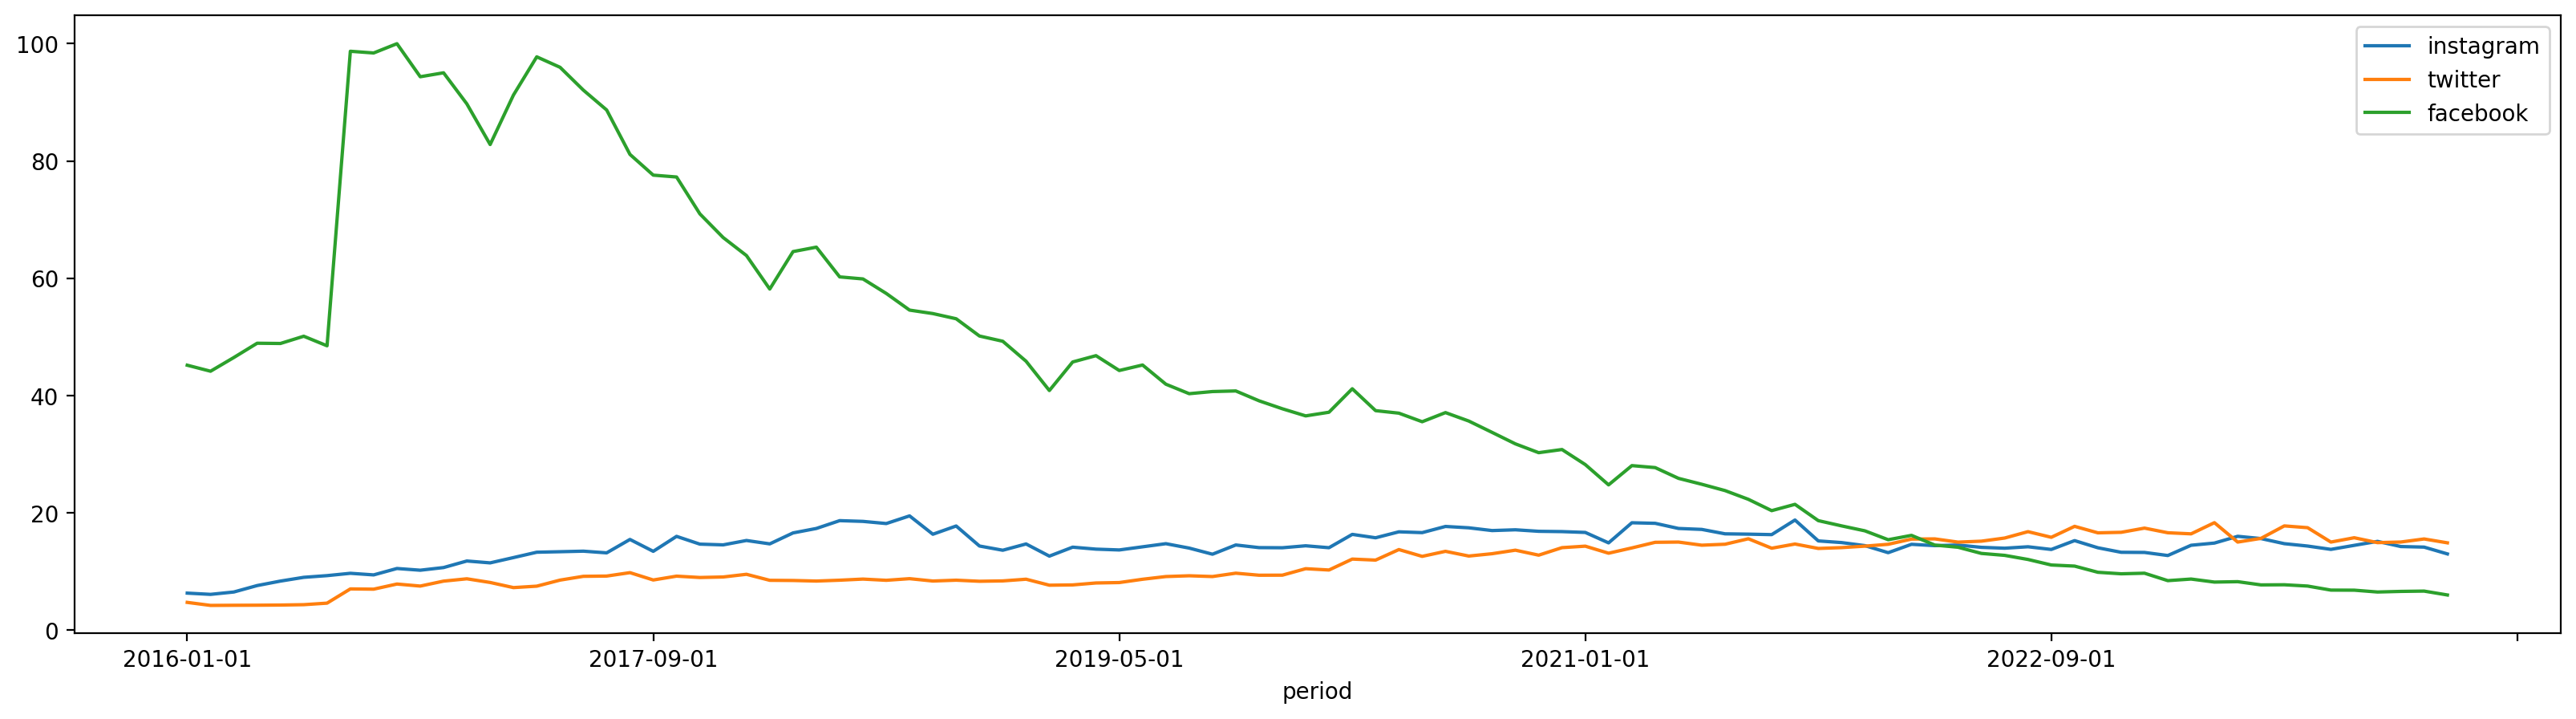

In [175]:
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()